# Problem Statement

The **SMS Spam Collection** is a set of SMS tagged messages that have been collected for SMS Spam research. It contains a total of 5,574 messages in English, tagged as either **ham** (legitimate) or **spam**.

The files contain one message per line. Each line is composed of two columns: 
- `v1`: Contains the raw text of the message.
- `v2`: Contains the label (`ham` or `spam`).

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import dataset
spam_df = pd.read_csv("emails.csv")
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [6]:
spam_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [7]:
spam_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
spam_df.tail(5)

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [9]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


- since not continuous above values for 5 number summary are not significant
- in terms of meaning

In [10]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# Dataset Visualization

In [11]:
ham = spam_df[spam_df['spam'] == 0]

In [12]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
spam = spam_df[spam_df['spam'] == 1]

In [14]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [15]:
print('Spam Percentage =', (len(spam)/len(spam_df))*100, '%')

Spam Percentage = 23.88268156424581 %


In [16]:
print('Ham Percentage =', (len(ham)/len(spam_df))*100, '%')

Ham Percentage = 76.11731843575419 %


<Axes: xlabel='spam', ylabel='count'>

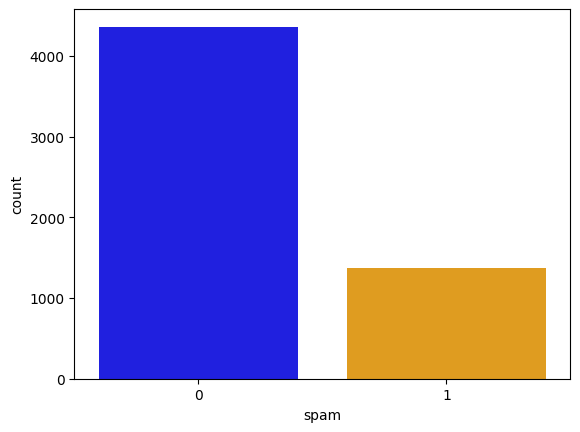

In [17]:
sns.countplot(x='spam', data=spam_df, hue='spam', palette=['blue', 'orange'], legend=False)

# Creating testing and training dataset/ data cleaning

## Count vectorizer example ##

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.',
              'This is the second document.',
              'This is the third document.',
              'Is this the first document?' ]

sample_vectorizer = CountVectorizer()

In [19]:
X = sample_vectorizer.fit_transform(sample_data)

In [20]:
print(X.toarray())

[[1 1 1 0 1 0 1]
 [1 0 1 1 1 0 1]
 [1 0 1 0 1 1 1]
 [1 1 1 0 1 0 1]]


In [21]:
print(sample_vectorizer.get_feature_names_out())

['document' 'first' 'is' 'second' 'the' 'third' 'this']


## Count Vectorizer Applied ##

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [23]:
x = vectorizer.get_feature_names_out()
print(x)

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [27]:
print(spamham_countvectorizer.shape)  

(5728, 37303)


# Training the Model #

In [35]:
label = spam_df['spam'].values

In [36]:
label

array([1, 1, 1, ..., 0, 0, 0], shape=(5728,))

In [38]:

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer,label)



MultinomialNB()

In [40]:
testing_sample = ['Free money!!!', 'Please let me know if you need further information.']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [43]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

In [45]:
testing_sample = ['I would like to book a hotel in Bali by January 24th', 'come get ur money']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([0, 1])

# Training and Testing Data Prior to Testing

In [48]:
X = spamham_countvectorizer
y = label

In [49]:
X.shape

(5728, 37303)

In [50]:
y.shape

(5728,)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Evaluating the Model

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 1, ..., 0, 0, 0], shape=(4582,))

<Axes: >

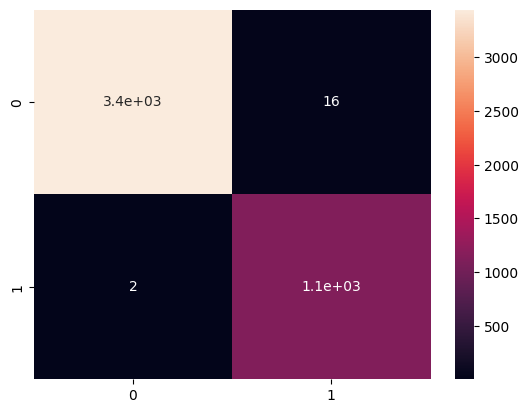

In [58]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

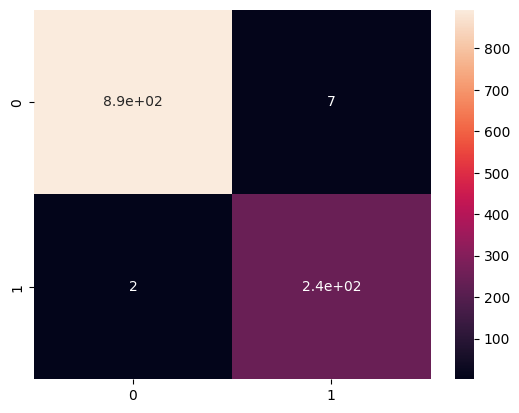

In [60]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [61]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       900
           1       0.97      0.99      0.98       246

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

